### SALES PREDICTION USING PYTHON 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Loading the dataset
data = pd.read_csv("Advertising.csv")

In [3]:
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [5]:
print(data.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [6]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


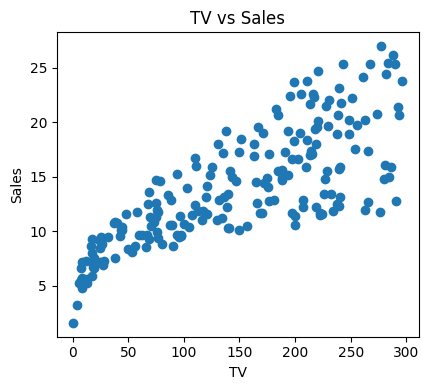

In [13]:
# EDA – relationships between features and Sales
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(data["TV"], data["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV vs Sales")

plt.tight_layout()
plt.show()

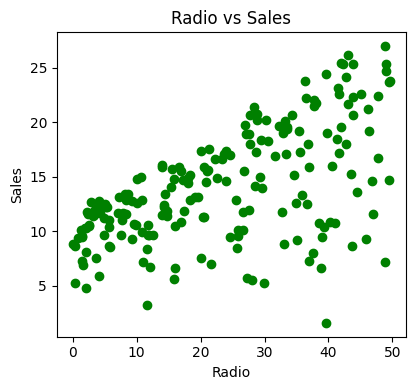

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 2)
plt.scatter(data["Radio"], data["Sales"], color="green")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Radio vs Sales")

plt.tight_layout()
plt.show()

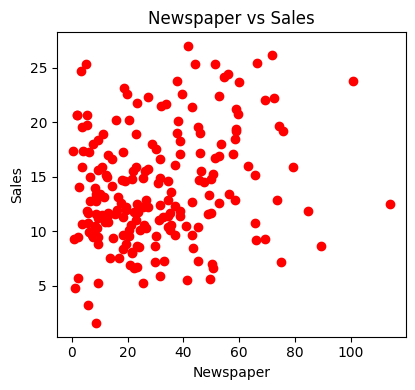

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 3)
plt.scatter(data["Newspaper"], data["Sales"], color="red")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales")

plt.tight_layout()
plt.show()

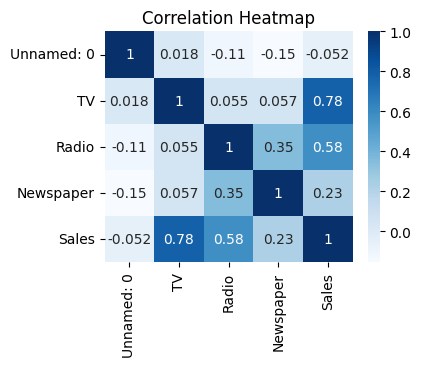

In [14]:
# Correlation heatmap 
plt.figure(figsize=(4, 3))
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# Prepare data for modeling
# Features: TV, Radio, Newspaper
X = data[["TV", "Radio", "Newspaper"]]
y = data["Sales"]

# Train‑test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]


In [18]:
# Predict on test data
y_pred = model.predict(X_test)

In [19]:
# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2 Score: 0.899438024100912
MSE: 3.1740973539761033
RMSE: 1.78159966153345


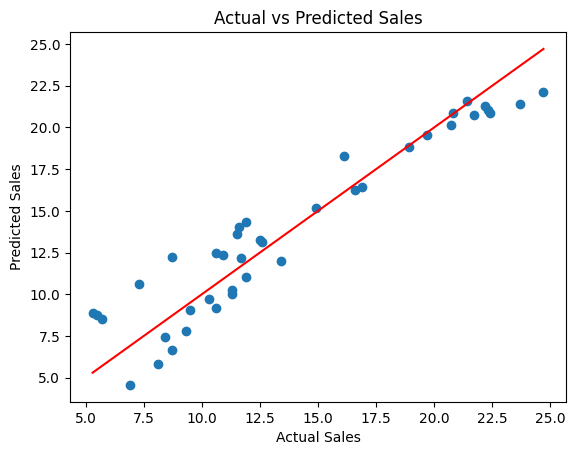

In [21]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")

x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color="red")
plt.show()

In [22]:
# Predict sales for a new ad budget for example
new_data = pd.DataFrame({
    "TV": [150],
    "Radio": [20],
    "Newspaper": [30]
})

new_pred = model.predict(new_data)
print("Predicted Sales for new campaign:", new_pred[0])

Predicted Sales for new campaign: 13.555229473358624
